##### KONLPY 사용을 위한 패키지 설치

In [1]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.co

In [2]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [3]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading 

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  2149k      0 --:--:-- --:--:-- --:--:-- 10.8M
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [4]:
%%bash
python3 -c "import jpype; jpype.startJVM(convertStrings=True); print(jpype.isJVMStarted())"

True


##### 명사 추출

In [2]:
import pandas as pd

import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

import nltk
from nltk import FreqDist
import numpy as np

import re
import regex

In [3]:
research = pd.read_excel('/content/2022년결과(개인정보제외)_제출_1.xls') #경로 설정이 필요합니다.
stopwords = pd.read_excel('/content/stopwords.xlsx')

In [4]:
import string

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
addendum = []
for j in range(len(research)):
  plus = ''
  output_string = str(research['홈페이지에서 제공받고 싶은 콘텐츠가 있다면 적어주세요.'][j]).translate(str.maketrans('', '', string.punctuation))
  output_string = output_string.strip()
  output_string = output_string.replace("\n"," ")
  output_string = output_string.replace("\r"," ")
  output_string = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", output_string)
  result = okt.pos(output_string)
  for token, pos in result:
    if pos.startswith('N'):
      if token.isalnum() == False or token.isdigit() == True or len(token) == 1:
        continue
      if token in stopwords['stopword'].values.tolist():
        continue
      plus += (token + ' ')
  addendum.append(plus)

In [7]:
improvements = []
for j in range(len(research)):
  plus = ''
  output_string = str(research['홈페이지를 이용하시면서 바라는 점이나 개선해야 할 사항이 있습니까?'][j]).translate(str.maketrans('', '', string.punctuation))
  output_string = output_string.strip()
  output_string = output_string.replace("\n"," ")
  output_string = output_string.replace("\r"," ")
  output_string = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", output_string)
  result = okt.pos(output_string)
  for token, pos in result:
    if pos.startswith('N'):
      if token.isalnum() == False or token.isdigit() == True or len(token) == 1:
        continue
      if token in stopwords['stopword'].values.tolist():
        continue
      plus += (token + ' ')
  improvements.append(plus)

In [8]:
research['추가사항 명사'] = addendum
research['개선사항 명사'] = improvements

In [9]:
research

,번호,접수번호,귀하의 성별은?,귀하의 연령은?,귀하의 거주지는?,귀하의 수원시 홈페이지 방문주기는?,홈페이지 디자인에 만족하십니까?,홈페이지 검색기능(결과)에 만족하십니까?,홈페이지의 메뉴 구성에 만족하십니까?,홈페이지 이용 시 접속 속도에 대해 만족하십니까?,...,수원시 홈페이지의 주된 방문 목적은 무엇입니까?(복수선택가능),홈페이지 서비스 중 더 보강해야 된다고 생각하는 부분은 무엇입니까?,홈페이지에서 제공되는 정보들에 대해 만족하십니까?,"홈페이지의 화면 구성, 메뉴별 기능, 정보의 정확성, 이용 편의성등 전반적으로 만족하십니까?",홈페이지에서 제공받고 싶은 콘텐츠가 있다면 적어주세요.,홈페이지를 이용하시면서 바라는 점이나 개선해야 할 사항이 있습니까?,등록일,등록시간,추가사항 명사,개선사항 명사
0,4166,221447,여,40대,수원시,연 6회 이하,대체로 만족,대체로 만족,매우만족,매우만족,...,"채용정보, 행사/축제",채용정보,대체로 만족,대체로 만족,추가할게 없다,글씨체나 컬러가 좀더 개선되면 좋겠다,2022-11-25,23:58:21.343,추가,글씨체 컬러 개선
1,4165,221445,여,30대,수원시,월 1 ~ 3회,대체로 만족,대체로 만족,보통,보통,...,"행사/축제, 민원신청, 분야별정보",민원신청,대체로 만족,대체로 만족,자유게시판으로 소통창구가 있으면 좋겠습니다,모바일 환경에서도 최적화 되면 좋겠고 메인화면 메뉴를 간소화하면 좋겠어요,2022-11-25,23:56:44.803,자유게시판 소통 창구,모바일 환경 최적화 메인 화면 메뉴 간소화
2,4164,221444,여,40대,수원시,연 6회 이하,대체로 만족,대체로 만족,대체로 만족,대체로 만족,...,"시정소식/각종소식, 채용정보, 공고/고시, 대형폐기물",채용정보,대체로 만족,대체로 만족,.,.,2022-11-25,23:53:13.607,,
3,4163,221443,여,50대 이상,수원시,월 1 ~ 3회,대체로 만족,보통,대체로 만족,보통,...,"시정소식/각종소식, 행사/축제, 민원신청",채용정보,대체로 만족,대체로 만족,지역사업,빠른접속,2022-11-25,23:51:50.063,지역 사업,접속
4,4162,221441,남,30대,수원시,거의 방문하지 않음,대체로 만족,대체로 만족,보통,매우만족,...,민원신청,분야별정보,대체로 만족,보통,없음,없음,2022-11-25,23:47:56.88,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161,5,212337,여,40대,경기도(수원시 외),주 2회 이상,매우만족,매우만족,매우만족,대체로 만족,...,"시정소식/각종소식, 행사/축제, 불법주정차, 공고/고시, 통합예약(교육,대관,공구)...",기타 (없어요),매우만족,매우만족,없음,없음,2022-11-14,09:12:29.037,,
4162,4,212336,남,40대,수원시,월 4회 이상,매우만족,대체로 만족,대체로 만족,보통,...,"시정소식/각종소식, 정보통통",행사/축제,대체로 만족,대체로 만족,"교육정보, 입시정보",^^,2022-11-14,09:12:21.453,교육 정보 입시 정보,
4163,3,212323,여,30대,수원시,월 1 ~ 3회,매우만족,매우만족,매우만족,매우만족,...,"시정소식/각종소식, 공고/고시",조직도,매우만족,매우만족,없습니다,없습니다,2022-11-14,09:05:55.583,,
4164,2,212307,남,30대,수원시,연 6회 이하,대체로 만족,대체로 만족,대체로 만족,매우만족,...,시정소식/각종소식,행사/축제,대체로 만족,대체로 만족,특별히 없음,디자인 개선,2022-11-14,09:02:29.82,,디자인 개선


In [ ]:
#저장
research.to_csv('설문조사.csv', encoding='utf-8-sig')

#### 키워드 입력 시 SNA 분석 결과를 보실 수 있습니다.

##### 추가 사항

In [10]:
addendum = []
for j in range(len(research)):
    plus = []
    output_string = str(research['홈페이지에서 제공받고 싶은 콘텐츠가 있다면 적어주세요.'][j]).translate(str.maketrans('', '', string.punctuation))
    output_string = output_string.strip()
    output_string = output_string.replace("\n"," ")
    output_string = output_string.replace("\r"," ")
    output_string = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", output_string)
    result = okt.pos(output_string)
    for token, pos in result:
        if pos.startswith('N'):
            if token.isalnum() == False or token.isdigit() == True or len(token) == 1:
                continue
            if token in stopwords['stopword'].values.tolist():
                continue
            plus.append(token)
    addendum.append(plus)

In [14]:
keyword = input('키워드를 입력해주세요 : ')

키워드를 입력해주세요 : 정보


In [15]:
count = {}   #동시출현 빈도가 저장될 dict
for article in addendum:
    article = list(set(article))
    for i, a in enumerate(article):
        for b in article[i:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            if a > b: a, b = b, a   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
            if a == keyword: count[a, b] = count.get((a, b), 0) + 1   #실제로 센다
          # count[a, b] = count.get((a, b), 0) + 1

In [16]:
import operator
sorted_x = sorted(count.items(), key=operator.itemgetter(1), reverse=True)
sorted_x = pd.DataFrame(sorted_x)

In [17]:
sorted_x

,0,1
0,"(정보, 행사)",141
1,"(정보, 축제)",39
2,"(정보, 혜택)",32
3,"(정보, 제공)",26
4,"(정보, 지역)",25
...,...,...
101,"(정보, 제외)",1
102,"(정보, 진행)",1
103,"(정보, 제도)",1
104,"(정보, 지능)",1


In [18]:
import re
import networkx as nx
import itertools

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [54]:
count_nouns = {}   #동시출현 빈도가 저장될 dict
for article in addendum:
    article = list(set(article))
    for i, a in enumerate(article):
        for b in article[i:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            if a > b: a, b = b, a   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
            if a == keyword: count_nouns[b] = count_nouns.get(b, 0) + 1   #실제로 센다
          # count[a, b] = count.get((a, b), 0) + 1
count_nouns[keyword] = len(count_nouns)

In [56]:
addendum_word2id = {string : i for i, string in enumerate(count_nouns.keys())}

In [57]:
addendum_id2word = {i: w for i, w in enumerate(count_nouns.keys())}

In [58]:
num_top_nouns = len(count_nouns)

In [ ]:
import numpy as np
addendum_adjacent_matrix = np.zeros((num_top_nouns, num_top_nouns), int)
for sentence in addendum:
    for wi, i in addendum_word2id.items():
        if wi in sentence:
            for wj, j in addendum_word2id.items():
                if i != j and wj in sentence:
                    addendum_adjacent_matrix[i][j] += 1
addendum_adjacent_matrix

In [ ]:
addendum_network = nx.from_numpy_matrix(addendum_adjacent_matrix)
list(addendum_network.adjacency())

In [69]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path = "NanumBarunGothic"
rc('font', family=font_path)

fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 1000,
    'arrowsize' : 200
}
nx.draw(addendum_network, labels=addendum_id2word, font_family=font_path, ax=ax, **option)

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 1000,
    'arrowsize' : 200
}
plt.title('Random Layout', fontsize=20)
nx.draw_random(addendum_network, labels=addendum_id2word, font_family=font_path,ax=ax, **option)
# 임의형 (Random) 알고리즘 : 노드들의 좌표값을 계산하거나 임의로 부여하여 그래프를 그리는 방식

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 1000,
    'arrowsize' : 200
}
plt.title('Circular Layout', fontsize=20)
nx.draw_circular(addendum_network, labels=addendum_id2word, font_family=font_path,ax=ax, **option)
# 단일 원형 알고리즘: 하나의 원주 공간에 일정 간격으로 노드를 배치하여 연결관계 그리는 방식

In [ ]:
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 1000,
    'arrowsize' : 200
}
plt.title('Spring Layout',fontsize=20)
nx.draw_spring(addendum_network, labels=addendum_id2word, font_family=font_path,ax=ax, **option)
# 힘기반 그래프 배치 (Force-based Graph Layout) 알고리즘 : 링크들이 서로 교차하는 것을 최소화하는 방식으로 그래프를 그리는 알고리즘

##### 개선사항

In [75]:
improvements = []
for j in range(len(research)):
    plus = []
    output_string = str(research['홈페이지에서 제공받고 싶은 콘텐츠가 있다면 적어주세요.'][j]).translate(str.maketrans('', '', string.punctuation))
    output_string = output_string.strip()
    output_string = output_string.replace("\n"," ")
    output_string = output_string.replace("\r"," ")
    output_string = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", output_string)
    result = okt.pos(output_string)
    for token, pos in result:
        if pos.startswith('N'):
            if token.isalnum() == False or token.isdigit() == True or len(token) == 1:
                continue
            if token in stopwords['stopword'].values.tolist():
                continue
            plus.append(token)
    improvements.append(plus)

In [76]:
keyword = input('키워드를 입력해주세요 : ')

키워드를 입력해주세요 : 정보


In [78]:
count = {}   #동시출현 빈도가 저장될 dict
for article in improvements:
    article = list(set(article))
    for i, a in enumerate(article):
        for b in article[i:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            if a > b: a, b = b, a   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
            if a == keyword: count[a, b] = count.get((a, b), 0) + 1   #실제로 센다
          # count[a, b] = count.get((a, b), 0) + 1

In [79]:
import operator
sorted_x = sorted(count.items(), key=operator.itemgetter(1), reverse=True)
sorted_x = pd.DataFrame(sorted_x)

In [80]:
sorted_x

,0,1
0,"(정보, 행사)",141
1,"(정보, 축제)",39
2,"(정보, 혜택)",32
3,"(정보, 제공)",26
4,"(정보, 지역)",25
...,...,...
101,"(정보, 제외)",1
102,"(정보, 진행)",1
103,"(정보, 제도)",1
104,"(정보, 지능)",1


In [81]:
count_nouns = {}   #동시출현 빈도가 저장될 dict
for article in improvements:
    article = list(set(article))
    for i, a in enumerate(article):
        for b in article[i:]:
            if a == b: continue   #같은 단어의 경우는 세지 않음
            if a > b: a, b = b, a   #A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
            if a == keyword: count_nouns[b] = count_nouns.get(b, 0) + 1   #실제로 센다
          # count[a, b] = count.get((a, b), 0) + 1
count_nouns[keyword] = len(count_nouns)

In [82]:
improvements_word2id = {string : i for i, string in enumerate(count_nouns.keys())}

In [83]:
improvements_id2word = {i: w for i, w in enumerate(count_nouns.keys())}

In [84]:
num_top_nouns = len(count_nouns)

In [85]:
import numpy as np
improvements_adjacent_matrix = np.zeros((num_top_nouns, num_top_nouns), int)
for sentence in improvements:
    for wi, i in improvements_word2id.items():
        if wi in sentence:
            for wj, j in improvements_word2id.items():
                if i != j and wj in sentence:
                    improvements_adjacent_matrix[i][j] += 1
improvements_adjacent_matrix

array([[  0,  12,  10, ...,   0,   0,  43],
       [ 12,   0,  18, ...,   0,   0, 150],
       [ 10,  18,   0, ...,   0,   0,  49],
       ...,
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   0,   1],
       [ 43, 150,  49, ...,   1,   1,   0]])

In [ ]:
improvements_network = nx.from_numpy_matrix(improvements_adjacent_matrix)
list(improvements_network.adjacency())

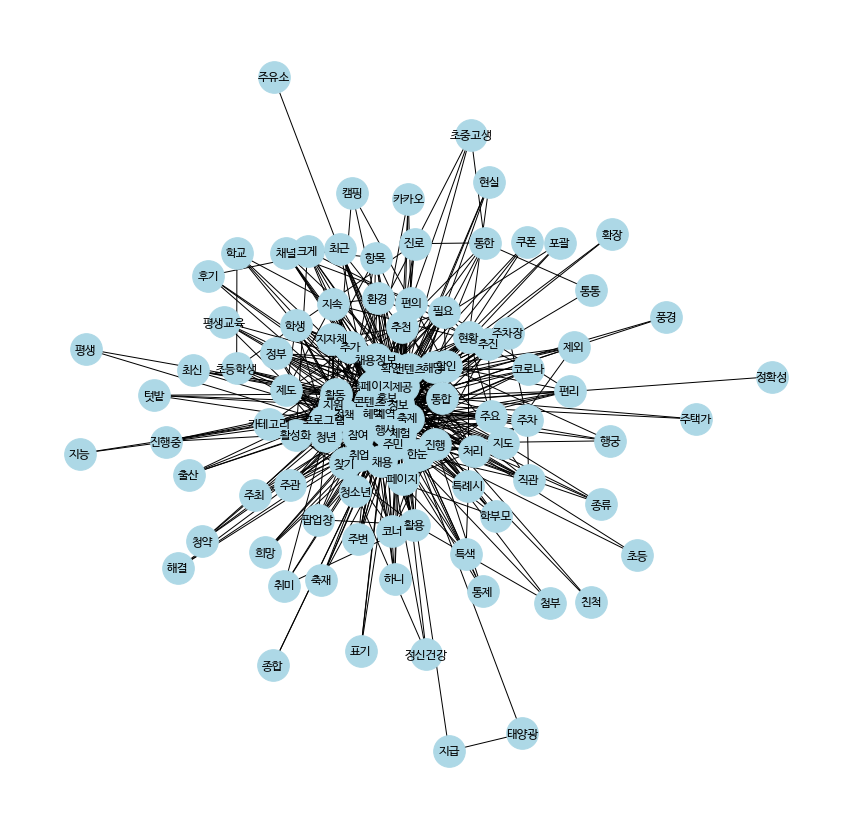

In [87]:
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 1000,
    'arrowsize' : 200
}
nx.draw(improvements_network, labels=addendum_id2word, font_family=font_path, ax=ax, **option)

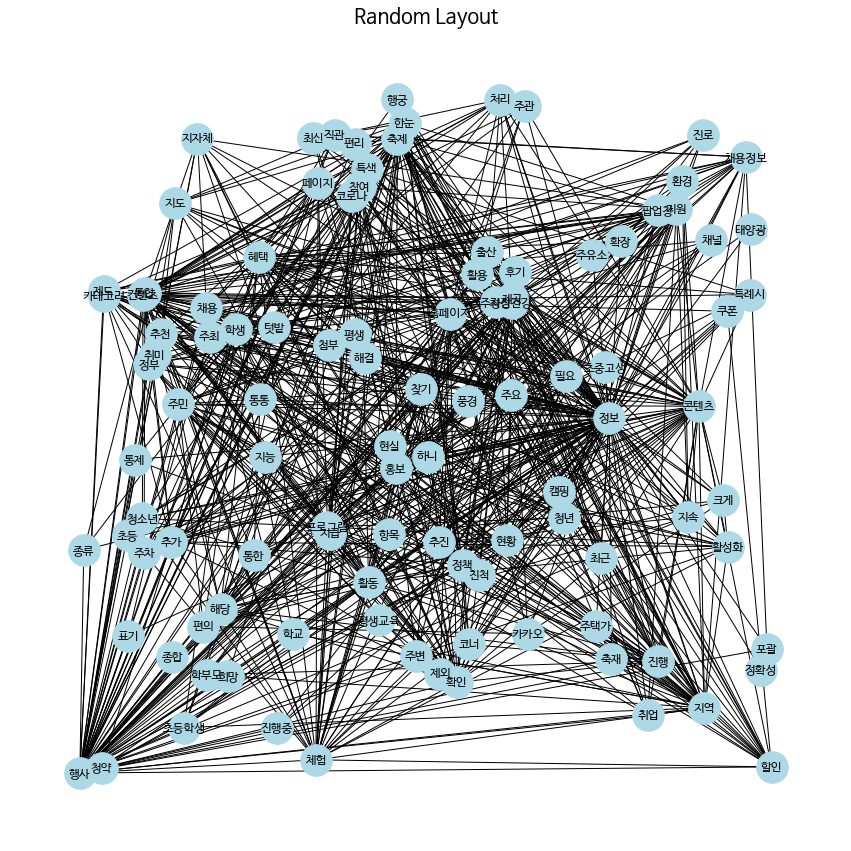

In [88]:
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 1000,
    'arrowsize' : 200
}
plt.title('Random Layout', fontsize=20)
nx.draw_random(improvements_network, labels=addendum_id2word, font_family=font_path,ax=ax, **option) 

# 임의형 (Random) 알고리즘 : 노드들의 좌표값을 계산하거나 임의로 부여하여 그래프를 그리는 방식

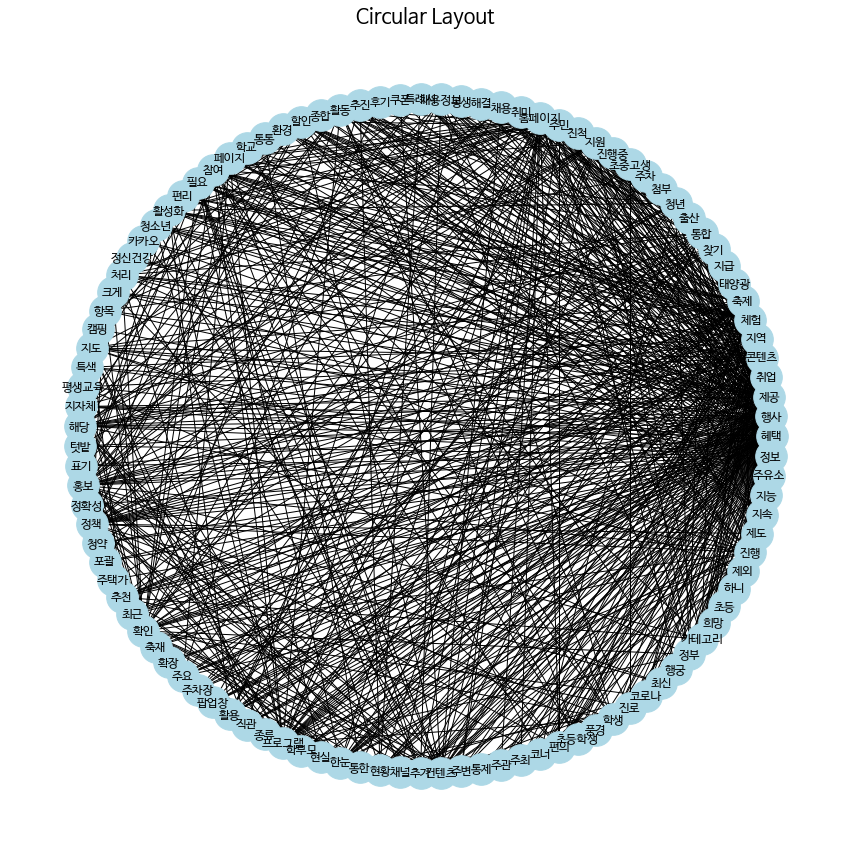

In [89]:
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 1000,
    'arrowsize' : 200
}
plt.title('Circular Layout', fontsize=20)
nx.draw_circular(improvements_network, labels=addendum_id2word, font_family=font_path,ax=ax, **option)

# 단일 원형 알고리즘: 하나의 원주 공간에 일정 간격으로 노드를 배치하여 연결관계 그리는 방식

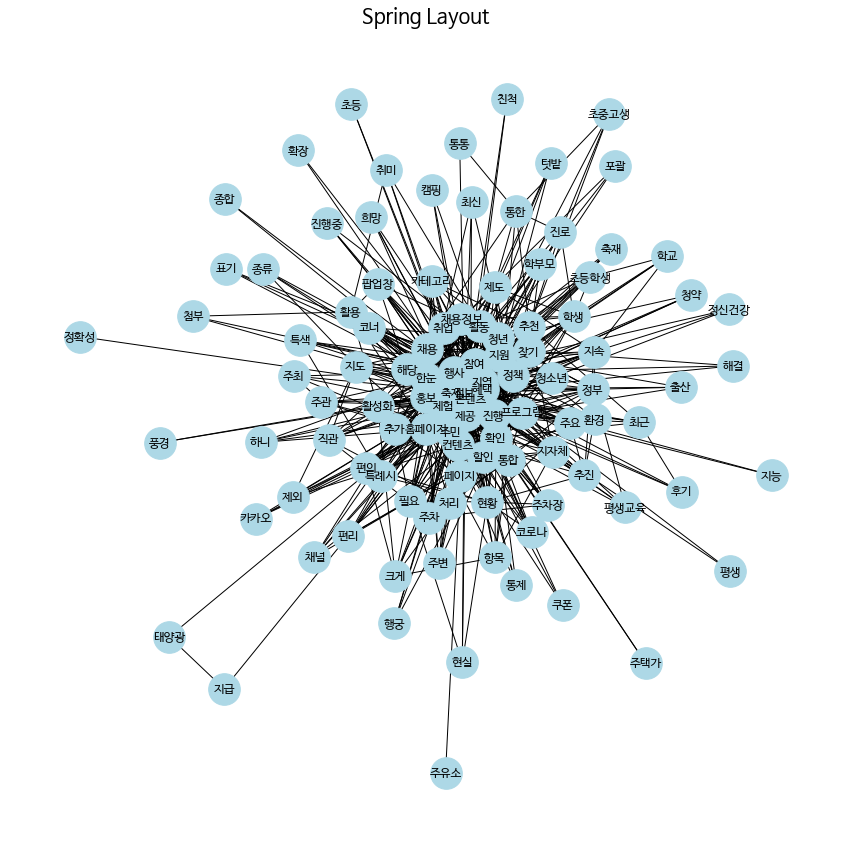

In [91]:
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 1000,
    'arrowsize' : 200
}
plt.title('Spring Layout',fontsize=20)
nx.draw_spring(improvements_network, labels=addendum_id2word, font_family=font_path,ax=ax, **option)

# 힘기반 그래프 배치 (Force-based Graph Layout) 알고리즘 : 링크들이 서로 교차하는 것을 최소화하는 방식으로 그래프를 그리는 알고리즘